In [108]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullAFTFitter
import matplotlib.pyplot as plt

### 1. Coleta e Preparação de Dados

In [109]:
url = "cancer_data.csv"
data = pd.read_csv(url)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [110]:
print(data.isnull().sum())
data = data.dropna()

data['sex'] = data['sex'].map({1: 'Male', 2: 'Female'})
data['status'] = data['status'].map({1: 'Censored', 2: 'Dead'})

inst          1
time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64


In [111]:
print(data.isnull().sum())
data.head()

inst         0
time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,Dead,68,Male,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,Dead,57,Male,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,Censored,74,Male,1.0,50.0,80.0,513.0,0.0
6,7.0,310,Dead,68,Female,2.0,70.0,60.0,384.0,10.0
7,11.0,361,Dead,71,Female,2.0,60.0,80.0,538.0,1.0


### 2. Análise de Kaplan-Meier

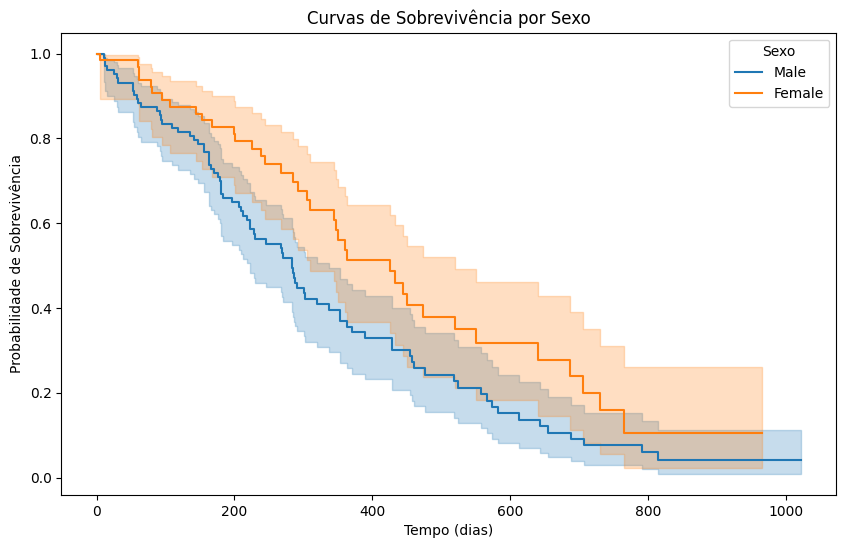

In [112]:
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for sex in data['sex'].unique():
    mask = data['sex'] == sex
    kmf.fit(durations=data[mask]['time'], event_observed=data[mask]['status'] == 'Dead', label=sex)
    kmf.plot_survival_function()

plt.title('Curvas de Sobrevivência por Sexo')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.legend(title='Sexo')
plt.show()

### 3. Análise de Decomposição

In [ ]:
model = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']]
model['status'] = model['status'].map({'Censored': 0, 'Dead': 1})
model['sex'] = model['sex'].map({'Male': 0, 'Female': 1})

# Modelo de Cox
cox_model = CoxPHFitter()
cox_model.fit(model, duration_col='time', event_col='status')
print("Resumo do Modelo de Cox")
print(cox_model.summary)

# Modelo de Weibull
weibull_model = WeibullAFTFitter()
weibull_model.fit(model, duration_col='time', event_col='status')
print("Resumo do Modelo de Weibull")
print(weibull_model.summary)


Resumo do Modelo de Cox
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.010803   1.010862  0.011600       -0.011932        0.033539   
sex       -0.553612   0.574870  0.201585       -0.948712       -0.158512   
ph.ecog    0.739530   2.094952  0.224987        0.298564        1.180496   
ph.karno   0.022438   1.022691  0.011232        0.000424        0.044452   
pat.karno -0.012074   0.987999  0.008116       -0.027981        0.003834   
meal.cal   0.000028   1.000028  0.000259       -0.000480        0.000537   
wt.loss   -0.014200   0.985900  0.007766       -0.029422        0.001022   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
age                   0.988139             1.034107     0.0  0.931329   
sex                   0.387239             0.853413     0.0 -2.746291   

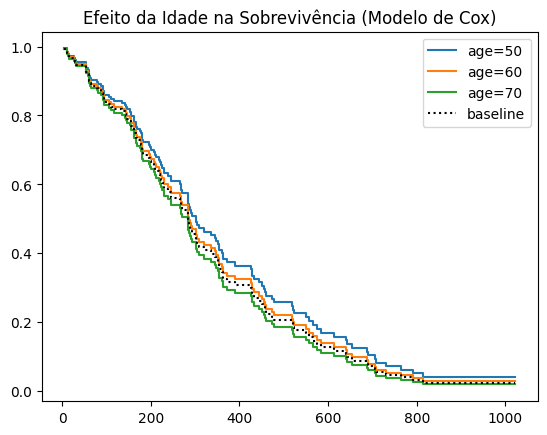

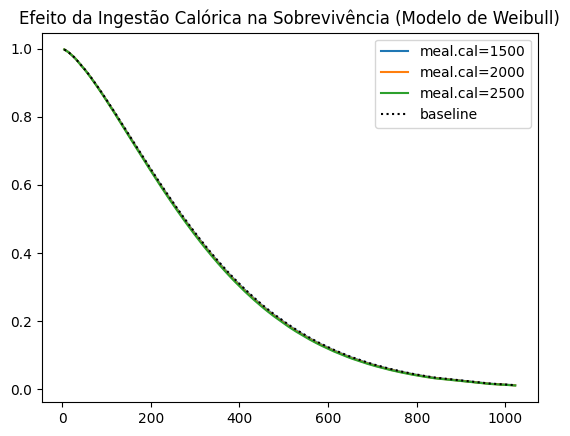

In [115]:
# Efeitos marginais para o Modelo de Cox
cox_model.plot_partial_effects_on_outcome(covariates='age', values=[50, 60, 70])
plt.title('Efeito da Idade na Sobrevivência (Modelo de Cox)')
plt.show()

# Efeitos marginais para o Modelo de Weibull
weibull_model.plot_partial_effects_on_outcome(covariates='meal.cal', values=[1500, 2000, 2500])
plt.title('Efeito da Ingestão Calórica na Sobrevivência (Modelo de Weibull)')
plt.show()


### 4. Visualização e Interpretação

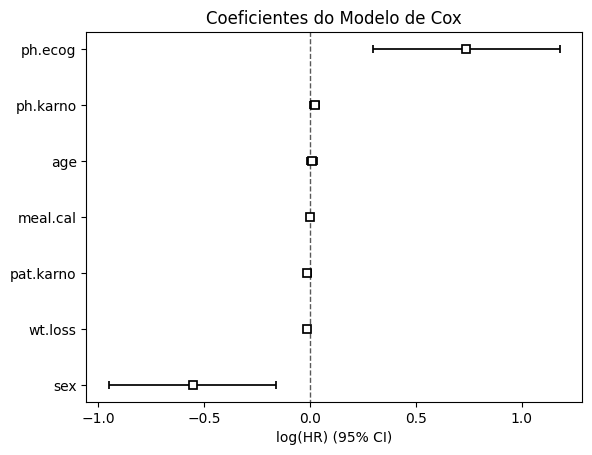

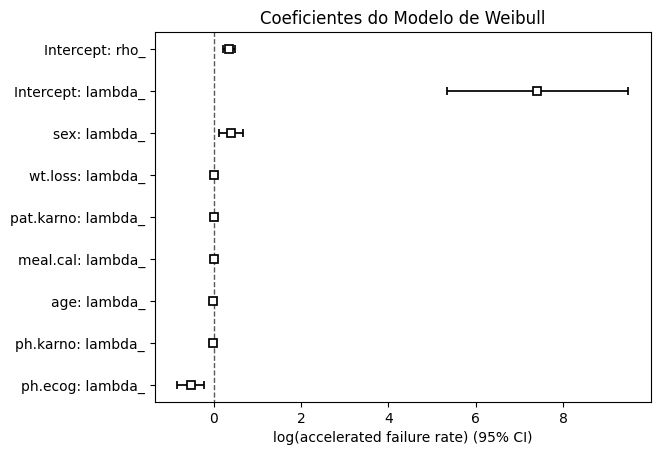

In [116]:
# Visualizar as contribuições das variáveis
cox_model.plot()
plt.title('Coeficientes do Modelo de Cox')
plt.show()

weibull_model.plot()
plt.title('Coeficientes do Modelo de Weibull')
plt.show()